## Carga y formatting del CSV de los datos

In [1]:
import cv2
import numpy
import pandas
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [2]:
data = pandas.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTvwmuQ-f2GebKR43ox55OIxy5qZxjc7bzmwYtAJSDfOQWRwON0wcyuPHZLlqkJDBLLF3h84krFVpKO/pub?gid=758289265&single=true&output=csv')
data = data.dropna(subset=['price'])
data

,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,1046563598019556549,https://www.airbnb.com/rooms/1046563598019556549,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,5.00,5.00,5.00,Exempt: This listing is a unit that has contra...,f,77,77,0,0,1.00
7195,1046568292864752336,https://www.airbnb.com/rooms/1046568292864752336,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN
7196,1047166785349446101,https://www.airbnb.com/rooms/1047166785349446101,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,233908696,https://www.airbnb.com/users/show/233908696,Together We,2019-01-02,...,NaN,NaN,NaN,STR-531165,t,2,2,0,0,NaN
7197,1047226383263246733,https://www.airbnb.com/rooms/1047226383263246733,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN


In [3]:
data.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'ava

In [4]:
# Elimina el símbolo "$" y las comas de la columna 'price', luego convierte los valores a formato numérico
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [5]:
# Muestra las primeras filas del DataFrame después de la modificación
print(data['price'].head())

0    125.0
1    135.0
2    179.0
3     91.0
4     86.0
Name: price, dtype: float64


## Descarga de imágenes

In [6]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

Normalización y conversión en el rango [0, 1]

In [7]:
images, idxs = download_images(data['picture_url'])
images = images.astype("float32") / 255.
images.shape

100%|██████████| 7199/7199 [30:04<00:00,  3.99it/s]


(7084, 224, 224, 3)

Filtrado acorde en los demás datos

In [8]:
# ¿De qué variables disponemos?
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'ava

In [9]:
filtered_data = data.iloc[idxs]
filtered_data

,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,1046563598019556549,https://www.airbnb.com/rooms/1046563598019556549,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,5.00,5.00,5.00,Exempt: This listing is a unit that has contra...,f,77,77,0,0,1.00
7195,1046568292864752336,https://www.airbnb.com/rooms/1046568292864752336,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN
7196,1047166785349446101,https://www.airbnb.com/rooms/1047166785349446101,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,233908696,https://www.airbnb.com/users/show/233908696,Together We,2019-01-02,...,NaN,NaN,NaN,STR-531165,t,2,2,0,0,NaN
7197,1047226383263246733,https://www.airbnb.com/rooms/1047226383263246733,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN


## Guardado de los datos para posterior uso/selección

In [10]:
numpy.save('images.npy', images)
filtered_data.to_csv('filtered_data.csv', sep=';', index=False)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!cp images.npy /content/drive/MyDrive/images_final.npy
!cp filtered_data.csv /content/drive/MyDrive/filtered_data.csv

!ls -lah images* filtered*  # Comprobación

-rw-r--r-- 1 root root 8.1M Apr 19 20:07 filtered_data.csv
-rw-r--r-- 1 root root 4.0G Apr 19 20:07 images.npy


In [32]:
# Comprobamos a abrirlos de nuevo
data = pandas.read_csv("/content/drive/MyDrive/filtered_data.csv", sep=';')
imgs = numpy.load("/content/drive/MyDrive/images_final.npy")
data.shape, imgs.shape

((7084, 72), (7084, 224, 224, 3))

Así, por ejemplo, cargamos y visualizamos la distribución de las etiquetas:

0       125.0
1       135.0
2       179.0
3        91.0
4        86.0
        ...  
7079     83.0
7080    107.0
7081    136.0
7082     83.0
7083    106.0
Name: price, Length: 7084, dtype: float64


<Axes: >

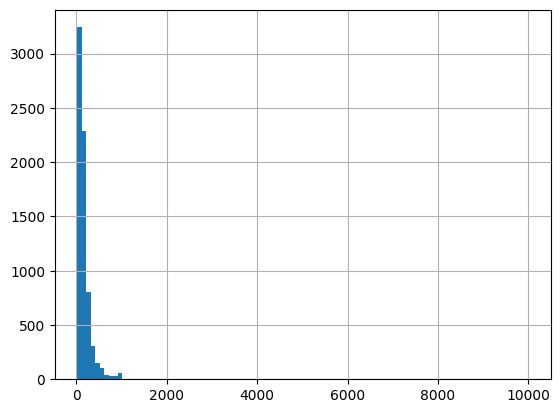

In [4]:
print(data['price'])
data['price'].hist(bins=100)

Y podemos dividir por porcentajes, para crear clases, como por ejemplo:

In [5]:
data['price'].describe()

count     7084.000000
mean       183.708498
std        304.138343
min         20.000000
25%         80.000000
50%        127.000000
75%        200.000000
max      10000.000000
Name: price, dtype: float64

<Axes: >

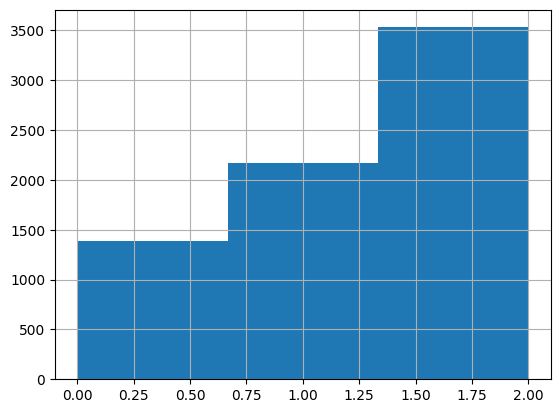

In [6]:
y_class = []
for y in data['price']:
  if y <= 70:
    y_class.append(0) # Rango más barato
  elif 70 < y <= 127:
    y_class.append(1) # Rango intermedio
  else:
    y_class.append(2)
y_class = pandas.Series(y_class)
y_class.hist(bins=3)

## Dividiendo los datos y las imágenes en train y test

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [33]:
data_train, data_test, imgs_train, imgs_test = train_test_split(data, imgs, test_size=0.2, random_state=42)

In [10]:
# Por cómodidad he dividido train y test en archivos diferentes
data_train.to_csv("/content/drive/MyDrive/filtered_data_train.csv", sep=';', decimal='.', index=False)
data_test.to_csv("/content/drive/MyDrive/filtered_data_test.csv", sep=';', decimal='.', index=False)

In [11]:
np.save("/content/drive/MyDrive/images_final_test.npy", imgs_test)

In [34]:
np.save("/content/drive/MyDrive/images_final_train.npy", imgs_train)

## Modelo 1D/tabular

### Análisi exploratorio de los datos de train

In [3]:
#Cargo el dataset de train
df_train = pd.read_csv("/content/drive/MyDrive/filtered_data_train.csv", sep=';')

In [4]:
# Elimino las columnas que no aportan ninguna información a el problema que vamos a abordar, ya sea porque son ids, enlaces o datos del anfitrión.
df_train = df_train.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
                    'host_id', 'host_url', 'host_name', 'host_since',
                   'host_location', 'host_about', 'calendar_last_scraped', 'host_thumbnail_url', 'host_has_profile_pic'], axis = 1)

In [5]:
df_train = df_train.drop(['host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count'], axis = 1)

In [6]:
# Ver las columnas con los valores nulos para realizar la imputación de valores.
columnas_con_nulos = df_train.columns[df_train.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)


Columnas con valores nulos:
['neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'bedrooms', 'beds', 'calendar_updated', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']


In [7]:
def imputar_valores(data, columnas):
    for columna in columnas:
        if data[columna].dtype == 'object':
            data[columna].fillna('', inplace=True)  # Imputación de espacio en blanco para columnas object
        else:
            media = data[columna].mean()
            data[columna].fillna(media, inplace=True)   # Imputación de la media para columnas numéricas

imputar_valores(df_train, columnas_con_nulos)

In [8]:
# Verificar que los valores nulos se hayan imputado correctamente
print(df_train.isnull().any())

# Ver las columnas con los valores nulos para realizar la imputación de valores.
columnas_con_nulos = df_train.columns[df_train.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)


picture_url                                     False
host_verifications                              False
host_identity_verified                          False
neighbourhood                                   False
neighbourhood_cleansed                          False
neighbourhood_group_cleansed                     True
latitude                                        False
longitude                                       False
property_type                                   False
room_type                                       False
accommodates                                    False
bathrooms                                        True
bathrooms_text                                  False
bedrooms                                         True
beds                                            False
amenities                                       False
price                                           False
minimum_nights                                  False
maximum_nights              

In [9]:
# Observamos que hay columnas que tienen todo valores nulos
print(df_train[['neighbourhood_group_cleansed', 'bathrooms', 'bedrooms', 'calendar_updated']].isnull().sum())


neighbourhood_group_cleansed    5667
bathrooms                       5667
bedrooms                        5667
calendar_updated                5667
dtype: int64


In [10]:
 # Eliminamos esas columnas ya que hay otras columnas que tienen la información que corresponde
df_train = df_train.drop(['neighbourhood_group_cleansed', 'bathrooms', 'bedrooms', 'calendar_updated'], axis = 1)

In [11]:
# Codificar las columnas categóricas

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for columna in df_train.columns:
    if df_train[columna].dtype == 'object':
        df_train[columna] = le.fit_transform(df_train[columna])  # Codificar la columna con LabelEncoder

# Imprimir las columnas que se han codificado
columnas_codificadas = [columna for columna in df_train.columns if df_train[columna].dtype == 'int64']
print("Columnas codificadas:", columnas_codificadas)


Columnas codificadas: ['picture_url', 'host_verifications', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'amenities', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']


###Análisis exploratorio de los datos de test

In [12]:
df_test = pd.read_csv("/content/drive/MyDrive/filtered_data_test.csv", sep=';')

In [13]:
# Elimina las columnas especificadas del DataFrame
df_test = df_test.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
                    'host_id', 'host_url', 'host_name', 'host_since',
                   'host_location', 'host_about', 'calendar_last_scraped', 'host_thumbnail_url', 'host_has_profile_pic'], axis = 1)

df_test = df_test.drop(['host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count'], axis = 1)

df_test = df_test.drop(['neighbourhood_group_cleansed', 'bathrooms', 'bedrooms', 'calendar_updated'], axis = 1)


In [14]:
# Ver las columnas con los valores nulos para realizar la imputación de valores.
columnas_con_nulos = df_test.columns[df_test.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
['neighbourhood', 'beds', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']


In [15]:
def imputar_valores(data, columnas):
    for columna in columnas:
        if data[columna].dtype == 'object':
            data[columna].fillna('', inplace=True)  # Imputación de espacio en blanco para columnas object
        else:
            media = data[columna].mean()  # Calcula la media para columnas numéricas
            data[columna].fillna(media, inplace=True)

imputar_valores(df_test, columnas_con_nulos)

In [16]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Iterar sobre todas las columnas del DataFrame
for columna in df_test.columns:
    if df_test[columna].dtype == 'object':  # Verificar si la columna es de tipo object
        df_test[columna] = le.fit_transform(df_test[columna])  # Codificar la columna con LabelEncoder

# Imprimir las columnas que se han codificado
columnas_codificadas = [columna for columna in df_test.columns if df_test[columna].dtype == 'int64']
print("Columnas codificadas:", columnas_codificadas)


Columnas codificadas: ['picture_url', 'host_verifications', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'amenities', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']


### Modelo 1D

In [17]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

bins = [0, 75, 127, np.inf]
labels = [0, 1, 2]
df_train['price'] = pd.cut(df_train['price'], bins=bins, labels=labels)
df_test['price'] = pd.cut(df_test['price'], bins=bins, labels=labels)

[INFO]: Entrenando red neuronal...
Epoch 1/100
36/36 [==============================] - 1s 16ms/step - loss: 1.1348 - accuracy: 0.4161 - val_loss: 1.0725 - val_accuracy: 0.4762
Epoch 2/100
36/36 [==============================] - 0s 7ms/step - loss: 1.0416 - accuracy: 0.4847 - val_loss: 1.0077 - val_accuracy: 0.4885
Epoch 3/100
36/36 [==============================] - 0s 7ms/step - loss: 0.9828 - accuracy: 0.5105 - val_loss: 0.9628 - val_accuracy: 0.5062
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 0.9390 - accuracy: 0.5456 - val_loss: 0.9271 - val_accuracy: 0.5485
Epoch 5/100
36/36 [==============================] - 0s 6ms/step - loss: 0.9029 - accuracy: 0.5727 - val_loss: 0.8960 - val_accuracy: 0.5794
Epoch 6/100
36/36 [==============================] - 0s 7ms/step - loss: 0.8715 - accuracy: 0.5987 - val_loss: 0.8686 - val_accuracy: 0.6120
Epoch 7/100
36/36 [==============================] - 0s 7ms/step - loss: 0.8432 - accuracy: 0.6159 - val_loss: 0.8438 

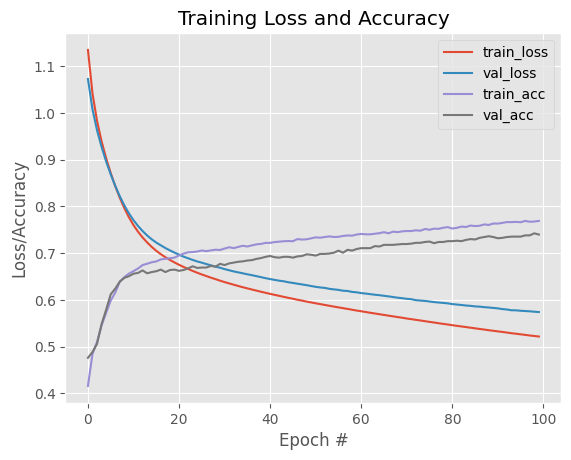

In [29]:


X_train = df_train.drop("price", axis=1)
y_train = df_train["price"]

X_test = df_test.drop("price", axis=1)
y_test = df_test["price"]

# Normalizar los datos
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Dividir los datos de entrenamiento en entrenamiento y validación
X_tr, X_val, y_tr, y_val = train_test_split(X_train_normalized, y_train, test_size=0.2, random_state=42)

lr = 0.01
n_epochs = 100
batch_size = 128

# Implementamos la red empleando Keras
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_tr.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Capa de salida con 3 neuronas para clasificación

# Compilamos y entrenamos el modelo
print("[INFO]: Entrenando red neuronal...")
opt = tf.keras.optimizers.SGD(learning_rate=0.01)  # Usamos SGD como optimizador
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr), metrics=["accuracy"])
H = model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos de prueba
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(X_test_normalized, batch_size=batch_size)
# Tomamos el índice del valor máximo en cada fila para obtener la clase predicha
predictions1 = np.argmax(predictions, axis=1)
# Convertimos 'y_test' de multilabel-indicator a multiclass
y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, predictions1))

# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


## Modelo 2D/imágenes

Te entrego lo que me ha dado tiempo de hacer de la práctica, ya que he tenido una semana complicada y no me ha dado tiempo de hacer más. Respecto a este ejercicio, como puedes observar no esta completo del todo ya que, aunque teoricamente se como funcionan tanto las redes neuronales convolucionales como el transformer learning que es lo que hacemos aquí, me cuesta el tema de pasarlo a código. No me cuesta el código a la hora de implementar una red o un modelo sino de que hacer con los datos e imágenes en este ejercicio. Pero bueno, de todas formas lo he intentado y he llegado hasta donde he podido, tengo que ponerme más las pilas en el manejo de los datos. Y te doy las gracias porque creo que ha sido de los módulos que más me han gustado, en parte gracias a tus explicaciones, así que queda pendiente una última explicación para finalizar está práctica. Lo dicho muchas gracias y estamos en contacto!

In [6]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Cargamos las imágenes
imgs_train = np.load("/content/drive/MyDrive/images_final_train.npy")
imgs_test = np.load("/content/drive/MyDrive/images_final_test.npy")

# Dividir las imágenes de entrenamiento en entrenamiento y validación
X_tr, X_val = train_test_split(imgs_train, test_size=0.2, random_state=42)

# Definimos el modelo base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=X_tr.shape[1:])
base_model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
# Congelamos todas las capas del modelo base para que no se entrenen
for layer in base_model.layers:
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# Añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.35)(x)
x = Dense(3, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Mostramos la estructura del modelo
model.summary()

# Comenzamos con el entrenamiento
epochs = 5
batch_size = 256

model.fit(X_train, Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)
